<a href="https://www.kaggle.com/code/sjagkoo7/health-of-horses-s3-ep22-xgb-lgbm-catboost?scriptVersionId=258154484" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

<div style = "color: White; display: fill;
              border-radius: 5px;
              background-color: #20BEFF;
              font-size: 100%;
              font-family: Verdana">
    
Predict whether or not a horse can survive based upon past medical conditions. There is an original dataset **horse-survival-dataset** I have also used for reference.**Outcome** is target variable.This is a **multi-class classification** challenge to predict horse survival using the provided features. We shall explore multi-class classification (not multi-label classification) as in competation description it is mention that submissions are evaluated on **micro-averaged F1-Score** between predicted and actual values. micro-averaged F1-Score is applicable for multi-class classification.

# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization like pie plot
import seaborn as sns # visualization like scatter plot 
pd.set_option('display.max_columns', 50) # display 50   columns by default
pd.set_option('display.max_rows', 50) # display 50 rows by default

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/horse-survival-dataset/horse.csv
/kaggle/input/playground-series-s3e22/sample_submission.csv
/kaggle/input/playground-series-s3e22/train.csv
/kaggle/input/playground-series-s3e22/test.csv


# Loading the Dataset

In [2]:
original=pd.read_csv('/kaggle/input/horse-survival-dataset/horse.csv')
train=pd.read_csv('/kaggle/input/playground-series-s3e22/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s3e22/test.csv')
submission=pd.read_csv('/kaggle/input/playground-series-s3e22/sample_submission.csv')

In [3]:
#dropping the id value as there is no importance for horse survival,it's just number
if 'id'  in train.columns :
    train=train.drop('id',axis=1)
    id=test['id']
    test=test.drop('id',axis=1)
else :
    pass

In [4]:
# first three rows of original dataset
original.head(3)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes


In [5]:
# first three rows of train dataset
train.head(3)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived


In [6]:
# first three rows of test dataset
test.head(3)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,slight,none,none,7.0,normal,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,more_3_sec,depressed,hypomotile,moderate,slight,none,3.5,decreased,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,less_3_sec,mild_pain,hypomotile,slight,slight,none,3.0,normal,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes


In [7]:
# first three rows of submission dataset
submission.head(3)

,id,outcome
0,1235,lived
1,1236,lived
2,1237,lived


# Exploring the Dataset

In [8]:
# Summary of Datasets
def summary(df):
    data = pd.DataFrame(index = df.columns)
    data['dtypes'] = df.dtypes
    data['count'] = df.count()
    data['#unique'] = df.nunique()
    data['#missing'] = df.isna().sum()
    data['missig%'] = df.isna().sum()/len(df)*100
    data = pd.concat([data,df.describe().T.drop('count',axis=1)],axis=1)
    return data 

In [9]:
# Summary of Training Dataset
summary(train).style.background_gradient(cmap='YlGnBu')

,dtypes,count,#unique,#missing,missig%,mean,std,min,25%,50%,75%,max
surgery,object,1235,2,0,0.000000,nan,nan,nan,nan,nan,nan,nan
age,object,1235,2,0,0.000000,nan,nan,nan,nan,nan,nan,nan
hospital_number,int64,1235,255,0,0.000000,954500.401619,1356403.138940,521399.000000,528800.000000,529777.000000,534145.000000,5305129.000000
rectal_temp,float64,1235,43,0,0.000000,38.202186,0.788668,35.400000,37.800000,38.200000,38.600000,40.800000
pulse,float64,1235,50,0,0.000000,79.574089,29.108638,30.000000,53.000000,76.000000,100.000000,184.000000
respiratory_rate,float64,1235,37,0,0.000000,30.054251,16.452066,8.000000,18.000000,28.000000,36.000000,96.000000
temp_of_extremities,object,1196,4,39,3.157895,nan,nan,nan,nan,nan,nan,nan
peripheral_pulse,object,1175,4,60,4.858300,nan,nan,nan,nan,nan,nan,nan
mucous_membrane,object,1214,6,21,1.700405,nan,nan,nan,nan,nan,nan,nan
capillary_refill_time,object,1229,3,6,0.485830,nan,nan,nan,nan,nan,nan,nan


In [10]:
# Summary of test Dataset
summary(test).style.background_gradient(cmap='YlOrBr')

,dtypes,count,#unique,#missing,missig%,mean,std,min,25%,50%,75%,max
surgery,object,824,2,0,0.000000,nan,nan,nan,nan,nan,nan,nan
age,object,824,2,0,0.000000,nan,nan,nan,nan,nan,nan,nan
hospital_number,int64,824,210,0,0.000000,1108357.197816,1555626.919032,521399.000000,528743.000000,529808.500000,534644.000000,5305129.000000
rectal_temp,float64,824,34,0,0.000000,38.244539,0.785234,36.000000,37.800000,38.200000,38.600000,40.800000
pulse,float64,824,49,0,0.000000,80.229369,29.164711,36.000000,54.000000,76.000000,100.000000,184.000000
respiratory_rate,float64,824,38,0,0.000000,30.719660,17.431910,9.000000,18.000000,28.000000,36.000000,96.000000
temp_of_extremities,object,789,4,35,4.247573,nan,nan,nan,nan,nan,nan,nan
peripheral_pulse,object,777,4,47,5.703883,nan,nan,nan,nan,nan,nan,nan
mucous_membrane,object,811,6,13,1.577670,nan,nan,nan,nan,nan,nan,nan
capillary_refill_time,object,818,3,6,0.728155,nan,nan,nan,nan,nan,nan,nan


<div style = "color: White; display: fill;
              border-radius: 5px;
              background-color: #20BEFF;
              font-size: 100%;
              font-family: Verdana">
    
<b>Insight:</b>
* We have numerical, categorical and object columns
* Missing Values: The dataset contains a significant number of NA values, data imputation  will be required .
* The column hosptial number can be treated as  a categorical variable because it represents the different hospitals.
* Outcome: Target variable is  "outcome" variable. Possibilities include: lived, died, was euthanized.

In [11]:
# train dataset - displaying rows if any have duplicate rows
train_duplicated_rows=train[train.duplicated()]
train_duplicated_rows

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome


In [12]:
# test dataset - displaying rows if any have duplicate rows
test_duplicated_rows=test[test.duplicated()]
test_duplicated_rows

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data


<div style = "color: White; display: fill;
              border-radius: 5px;
              background-color:  #20BEFF;
              font-size: 100%;
              font-family: Verdana">
    
* There is no duplicated rows in train & test dataset

In [13]:
#train dataset - displaying rows if any have null rows
train[train.isna().any(axis=1)]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
6,yes,adult,534787,38.3,36.0,16.0,cool,reduced,normal_pink,less_3_sec,severe_pain,normal,slight,none,more_1_liter,2.0,decreased,NaN,43.0,75.0,cloudy,1.0,no,3111,0,0,yes,euthanized
9,yes,adult,529640,38.3,129.0,48.0,cool,reduced,pale_pink,less_3_sec,depressed,absent,moderate,slight,none,4.4,NaN,NaN,57.0,4.9,cloudy,2.9,yes,3209,0,0,yes,died
14,yes,adult,528134,38.0,124.0,88.0,cool,reduced,bright_red,less_3_sec,depressed,hypomotile,none,slight,more_1_liter,7.0,NaN,NaN,39.0,13.0,serosanguious,6.6,yes,2206,0,0,yes,lived
15,no,adult,528305,38.3,44.0,24.0,warm,normal,pale_pink,less_3_sec,alert,hypermotile,none,slight,none,3.0,normal,NaN,33.0,6.5,cloudy,3.6,no,31110,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,yes,adult,534293,38.5,132.0,48.0,cool,reduced,pale_cyanotic,more_3_sec,depressed,absent,severe,none,none,2.0,absent,NaN,57.0,82.0,cloudy,2.0,no,1400,0,0,no,euthanized
1221,yes,adult,533942,38.3,112.0,16.0,cool,reduced,normal_pink,less_3_sec,depressed,absent,none,none,more_1_liter,2.0,decreased,NaN,51.0,75.0,serosanguious,2.0,yes,6209,0,0,no,euthanized
1223,yes,adult,529304,38.0,44.0,14.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,7.0,decreased,NaN,59.0,7.2,cloudy,2.1,yes,5400,0,0,no,died
1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,depressed,absent,moderate,none,more_1_liter,2.0,NaN,distend_large,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived


In [14]:
#test dataset - displaying rows if any have null rows
test[test.isna().any(axis=1)]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
3,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,less_3_sec,depressed,absent,severe,slight,more_1_liter,2.0,absent,distend_large,75.0,81.0,NaN,1.0,yes,1400,0,0,no
4,yes,adult,529840,38.3,50.0,12.0,NaN,normal,bright_pink,less_3_sec,mild_pain,absent,slight,slight,none,3.0,decreased,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes
5,yes,adult,530239,38.5,104.0,36.0,cool,normal,bright_red,more_3_sec,severe_pain,absent,slight,NaN,more_1_liter,5.0,normal,distend_small,69.0,8.9,serosanguious,6.0,yes,2207,0,0,yes
7,no,young,528503,40.3,114.0,36.0,cool,reduced,pale_cyanotic,more_3_sec,depressed,hypomotile,moderate,none,none,7.0,decreased,NaN,48.0,7.0,serosanguious,2.8,yes,2209,0,0,yes
9,no,adult,527563,38.3,64.0,22.0,normal,normal,bright_pink,less_3_sec,depressed,hypermotile,none,slight,none,7.0,NaN,NaN,54.0,6.0,clear,1.0,no,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,no,adult,534933,37.5,84.0,36.0,cool,reduced,bright_pink,more_3_sec,depressed,hypomotile,severe,NaN,more_1_liter,4.0,absent,NaN,64.0,64.0,NaN,2.0,no,1400,0,0,no
819,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,more_3_sec,depressed,hypomotile,moderate,NaN,none,7.0,normal,distend_large,57.0,8.1,serosanguious,4.5,yes,3205,0,0,yes
821,yes,adult,529640,39.2,132.0,12.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,6.5,decreased,NaN,53.0,7.6,serosanguious,4.5,yes,2205,0,0,no
822,no,adult,5287179,38.3,54.0,66.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,7.0,normal,NaN,49.0,8.6,clear,5.0,no,3111,0,0,yes


In [15]:
# Dataset Attributes Description
train.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #20BEFF; font-size:100%; text-align:left">

<h3 align="left"><font color='#d79190'>💡 Dataset Attributes Description:</font></h3>

<table border="1" cellpadding="5" cellspacing="0">
    <thead>
        <tr>
            <th>Attribute</th>
            <th>Description</th>
            <th>Values</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>surgery?</td>
            <td>Whether the horse had surgery</td>
            <td>1 = Yes, 2 = No</td>
        </tr>
        <tr>
            <td>Age</td>
            <td>Age category of the horse</td>
            <td>1 = Adult, 2 = Young (&lt; 6 months)</td>
        </tr>
        <tr>
            <td>Hospital Number</td>
            <td>Case number assigned to the horse</td>
            <td>Numeric ID</td>
        </tr>
        <tr>
            <td>rectal temperature</td>
            <td>Temperature in degrees celsius</td>
            <td>Linear</td>
        </tr>
        <tr>
            <td>pulse</td>
            <td>Heart rate in beats per minute</td>
            <td>Linear</td>
        </tr>
        <tr>
            <td>respiratory rate</td>
            <td>Rate of respiration</td>
            <td>Linear</td>
        </tr>
        <tr>
            <td>temperature of extremities</td>
            <td>Indication of peripheral circulation</td>
            <td>1 = Normal, 2 = Warm, 3 = Cool, 4 = Cold</td>
        </tr>
        <tr>
            <td>peripheral pulse</td>
            <td>Subjective assessment of peripheral pulse</td>
            <td>1 = Normal, 2 = Increased, 3 = Reduced, 4 = Absent</td>
        </tr>
        <tr>
            <td>mucous membranes</td>
            <td>Measurement of color of mucous membranes</td>
            <td>1-6 as described in the given data</td>
        </tr>
        <tr>
            <td>capillary refill time</td>
            <td>Clinical judgment of capillary refill time</td>
            <td>1 = &lt; 3 seconds, 2 = &gt;= 3 seconds</td>
        </tr>
        <tr>
            <td>pain</td>
            <td>Level of pain</td>
            <td>1 = no pain, 2 = depressed, 3 = intermittent mild pain, 4 = intermittent severe pain, 5 = continuous severe pain </td>
        </tr>
        <tr>
            <td>peristalsis</td>
            <td>An indication of the activity in the horse's gut.</td>
            <td>absent,hypomotile,hypermotile,normal </td>
        </tr>
        <tr>
            <td>abdominal distention</td>
            <td>an animal with abdominal</td>
            <td>1 = none, 2 = slight, 3 = moderate, 4 = severe </td>
        </tr>
        <tr>
            <td>nasogastric tube</td>
            <td> any gas coming out of the tube</td>
            <td>1 = none, 2 = slight, 3 = significant </td>
        </tr>
        <tr>
            <td>nasogastric_reflux</td>
            <td> the greater amount of reflux, the more likelihood that there is some serious</td>
            <td>1 = none, 2 = > 1 liter, 3 = &lt; 1 liter </td>
        </tr>
        <tr>
            <td>nasogastric_reflux_ph</td>
            <td> scale is from 0 to 14 with 7 being neutral - normal values are in the 3 to 4 range</td>
            <td>linear </td>
        </tr>
        <tr>
            <td>rectal_exam_feces</td>
            <td> indicates an obstruction</td>
            <td>1 = normal, 2 = increased, 3 = decreased, 4 = absent  </td>
        </tr>
        <tr>
            <td>abdomen</td>
            <td> intestine size</td>
            <td>1 = normal ,2 = other, 3 = large intestine, 4 = small intestine ,5 = distended </td>
        </tr>
        <tr>
            <td>packed_cell_volume</td>
            <td> red cells by volume in the blood - normal range is 30 to 50.</td>
            <td>linear</td>
        </tr>
        <tr>
            <td>total_protein</td>
            <td> normal values lie in the 6-7.5 (gms/dL) range - the higher the value the greater the dehydration</td>
            <td>linear</td>
        </tr>  
        <tr>
            <td>abdominocentesis appearance</td>
            <td>Appearance of fluid from abdominocentesis</td>
            <td>1 = Clear, 2 = Cloudy, 3 = Serosanguinous</td>
        </tr>
        <tr>
            <td>abdomcentesis total protein</td>
            <td>Total protein from abdominocentesis</td>
            <td>Linear (gms/dL)</td>
        </tr>
        <tr>
            <td>outcome</td>
            <td>Horse will survive ?</td>
            <td>1 = Lived, 2 = Died, 3 = Euthanized</td>
        </tr>
        <tr>
            <td>surgical lesion?</td>
            <td>If the lesion was surgical</td>
            <td>1 = Yes, 2 = No</td>
        </tr>
        <tr>
            <td>type of lesion {lesion_1,lesion_2,lesion_3}</td>
            <td>Type of lesion identified</td>
            <td>Comprehensive description given (Multiple layers)</td>
        </tr>
        <tr>
            <td>cp_data</td>
            <td>Presence of pathology data for the case</td>
            <td>1 = Yes, 2 = No</td>
        </tr>
    </tbody>
</table>

</div>

# Visualization

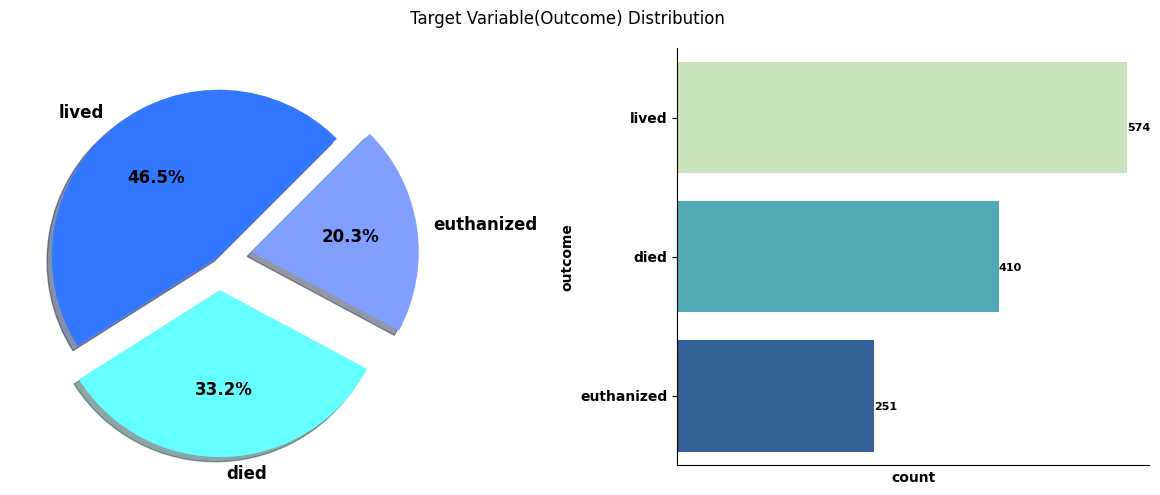

In [16]:
# Target variable distribution
fig, ax = plt.subplots(1,2,figsize=(12,5))

# ax[0] means first columns -- ax[0][0]
# ax[1] means second columns -- ax[0][1]

ax[0].pie(x=train.outcome.value_counts(),
          explode= [0.0, 0.2, 0.2],startangle= 45,
          shadow = True,colors = ['#3377ff', '#66ffff','#809fff'],
          autopct='%.1f%%',labels=train.outcome.value_counts().index,
          textprops={'fontsize': 12, 'weight': 'bold'})
# explode -- to make slice in pie graph and array value represent the distance between one slice to another
# startangle -- to rotate slice
# shadow -- to create shadow of graph i.e. back image

sns.barplot(x=train.outcome.value_counts(),y=train.outcome.value_counts().index,ax=ax[1], palette='YlGnBu')

plt.setp(ax[1].get_yticklabels(), fontweight="bold") # get_yticklabels will fetch the yticklabels the setup will set again with bold changes
plt.setp(ax[1].get_xticklabels(), fontweight="bold") # get_yticklabels will fetch the xticklabels the setup will set again with bold changes
ax[1].set_xlabel('count',fontweight="bold") # set x label
ax[1].set_ylabel('outcome',fontweight="bold") # set x label

ax[1].spines['top'].set_visible(False) # it will remove the top boundry line
ax[1].spines['right'].set_visible(False) # it will remove the right boundry line

# it will remove the x-axis tick and label
ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

val_count=train.outcome.value_counts()
for i,v in enumerate(val_count):
    ax[1].text(v,i+0.1,str(v), fontdict={'fontsize':8,'fontweight':'bold'})
# text --  is a function to add text to the graph
# v, i+0.1 -- These are the x and y coordinates where the text will be placed. v is the value from the s1 array, and i+0.1 adds a small vertical offset to position the text slightly above the corresponding bar in the chart.
# str(v) -- is the text 

fig.suptitle('Target Variable(Outcome) Distribution')
plt.tight_layout()
plt.show()

In [17]:
# splitting categroical and continuous variables

# unique value counts for each column
unique_count=train.nunique()

# unique count to distinguish between categroical and continuous
max_unique=10

cat_cols=unique_count[unique_count<=max_unique].index.to_list()
cont_cols=unique_count[unique_count>max_unique].index.to_list()

#removing 'outcome'  from categorical variable as it is target variable
if 'outcome' in cat_cols:
    cat_cols.remove('outcome')


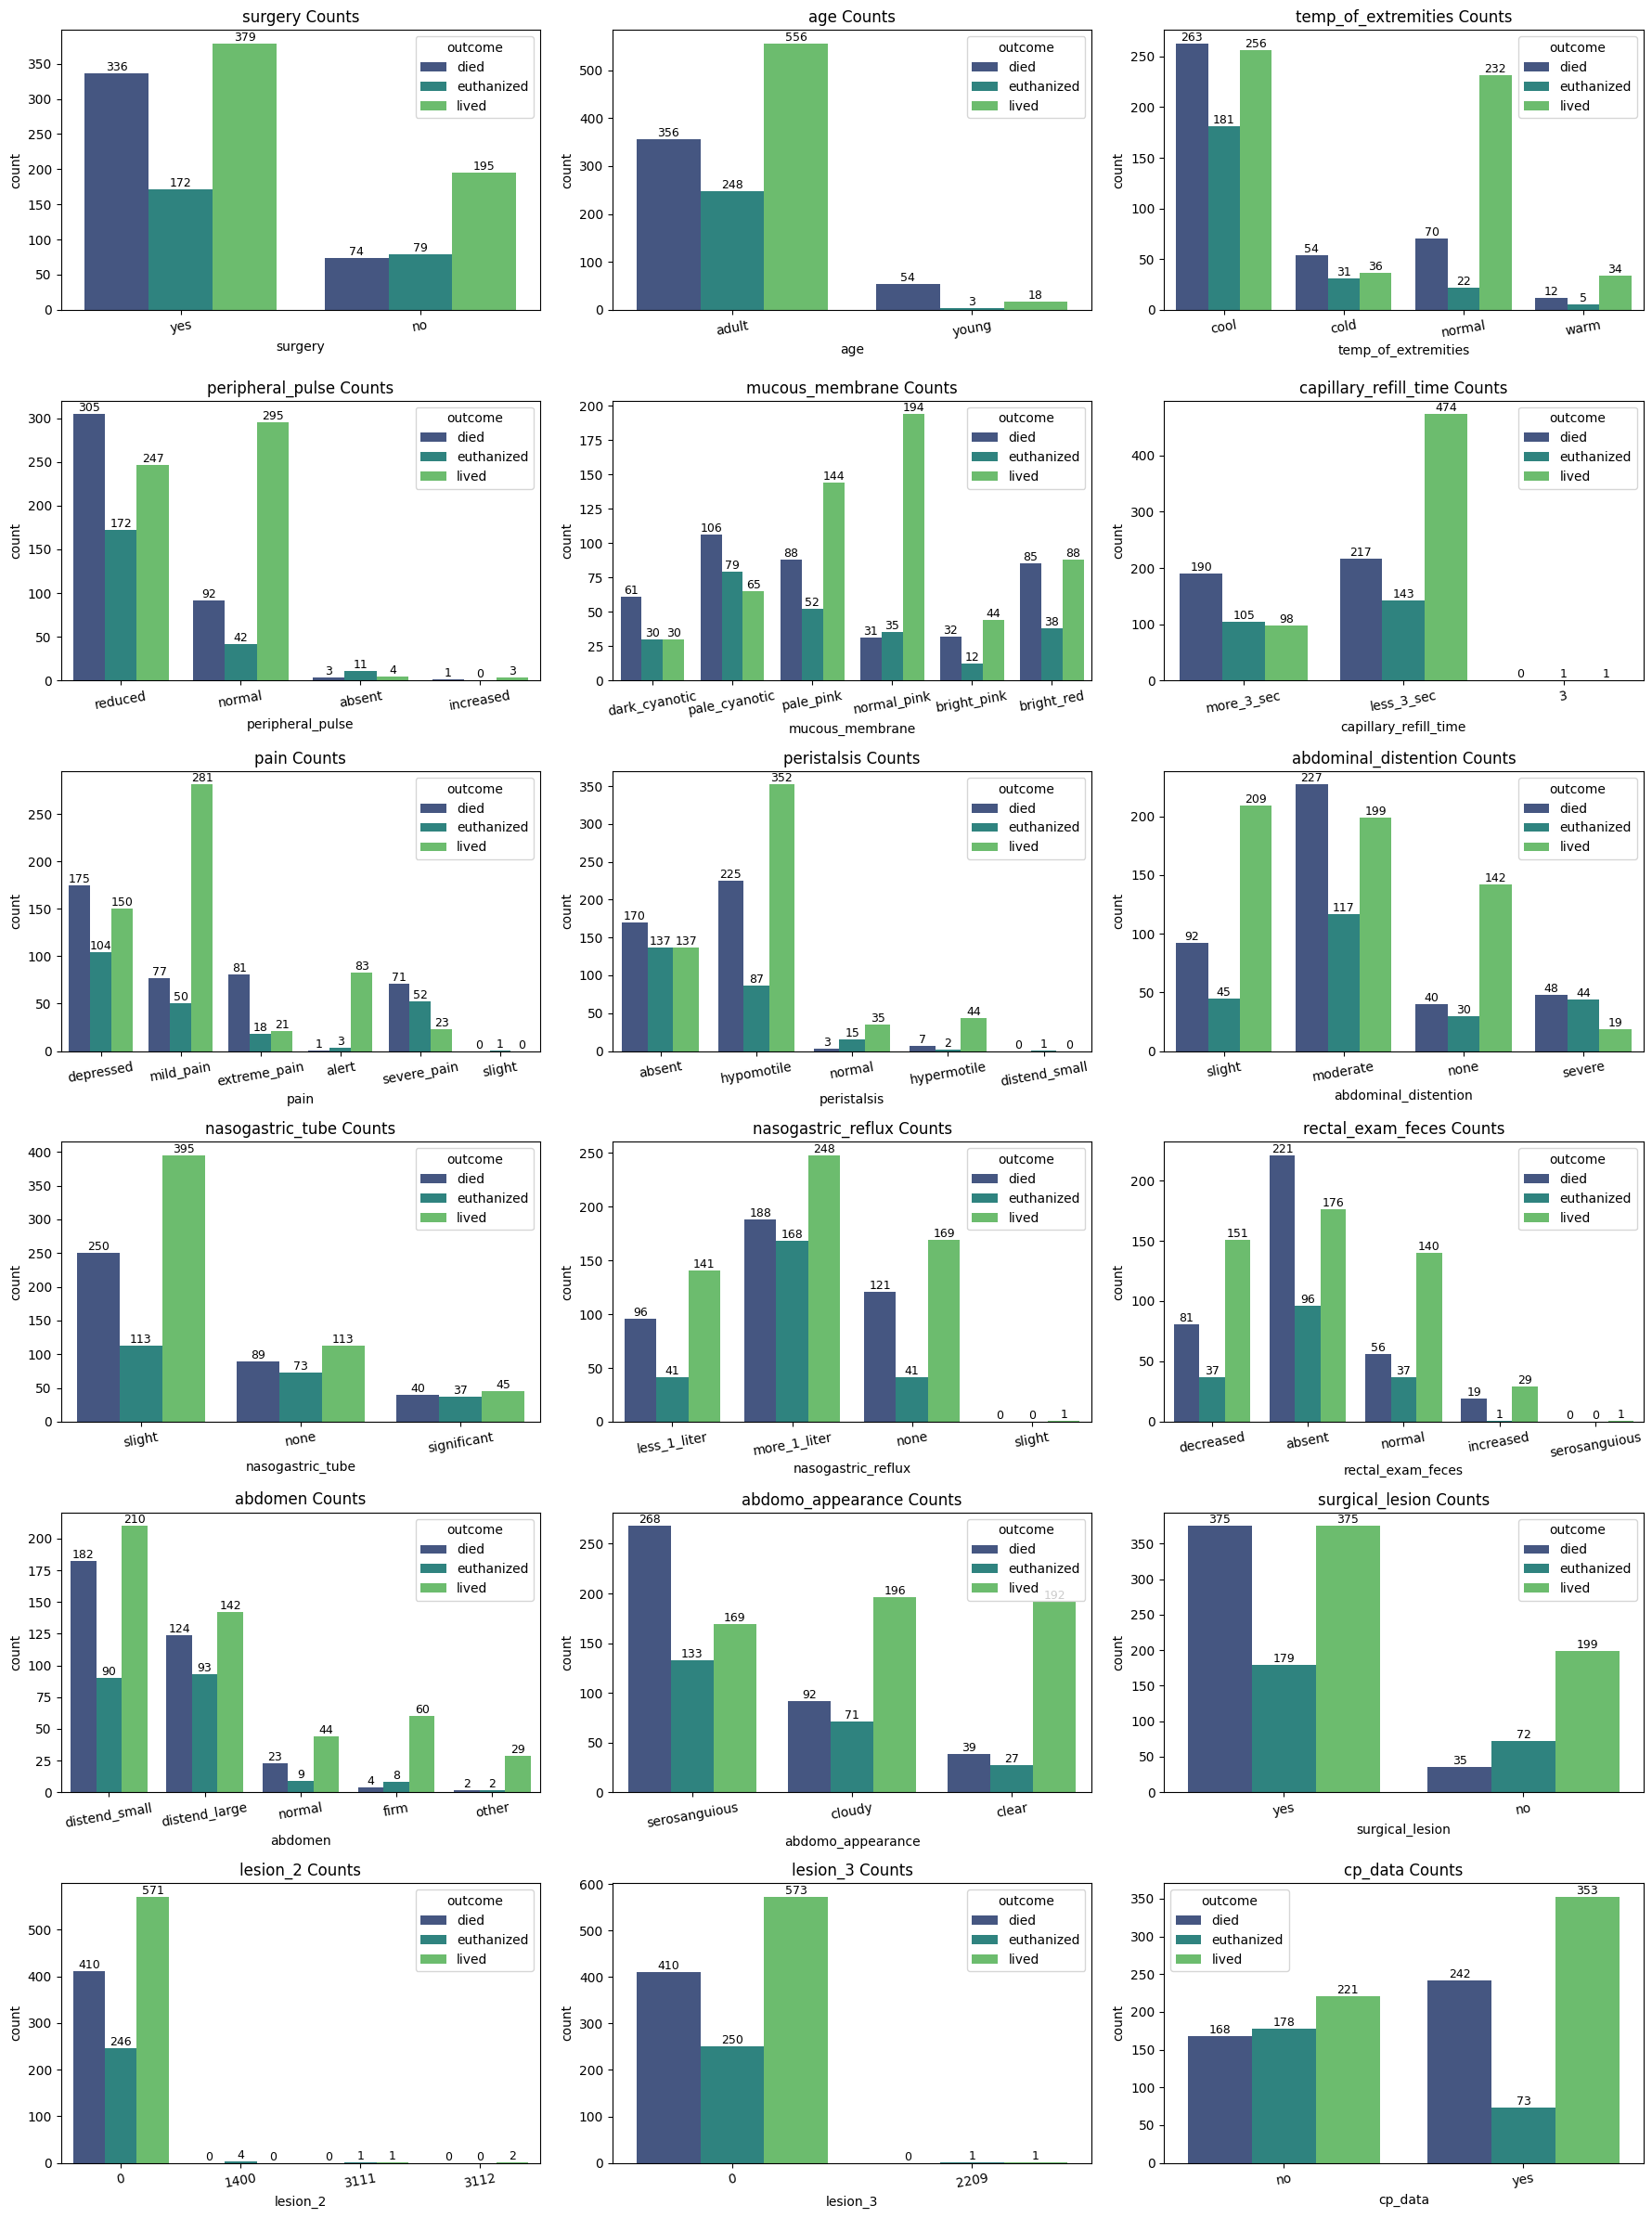

In [18]:
# Categorical Variable Distribution
def cat_distribution(df,columns,n_cols,hue):
    '''
    # Function to plot countplot for categorical varaible distribution
    df: train dataset
    columns: category variables
    n_cols: num of cols
    '''
    n_rows=len(columns)//n_cols
    fig,ax=plt.subplots(n_rows,n_cols,figsize=(18,4*n_rows))
    ax=ax.flatten()  # Convert the ax array into a 1D array. means it converts ax 2-D array (6,3) into 1-D array to avoid issues.
    for i,column in enumerate(columns):
        sns.countplot(data=df,x=column,hue=hue,ax=ax[i],palette='viridis')
        ax[i].set_title(f'{column} Counts',fontsize=12)
        ax[i].tick_params(axis='x',rotation=10)
        
        #give the count on each bar graph
        for p in ax[i].patches: # patches - contain the individual bar elements. Using patches we can access each element of bar graph
            value = int(p.get_height())
            ax[i].annotate(f'{value:.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                           ha='center', va='bottom', fontsize=9)
        
    plt.tight_layout()
    plt.show()
    
cat_distribution(train,cat_cols,3,'outcome')

#### Observations :
* `lesion_2` Counts and `lesion_3` Counts appear to have similar distributions. When they are not 0, the horse has a high probability of not dying.

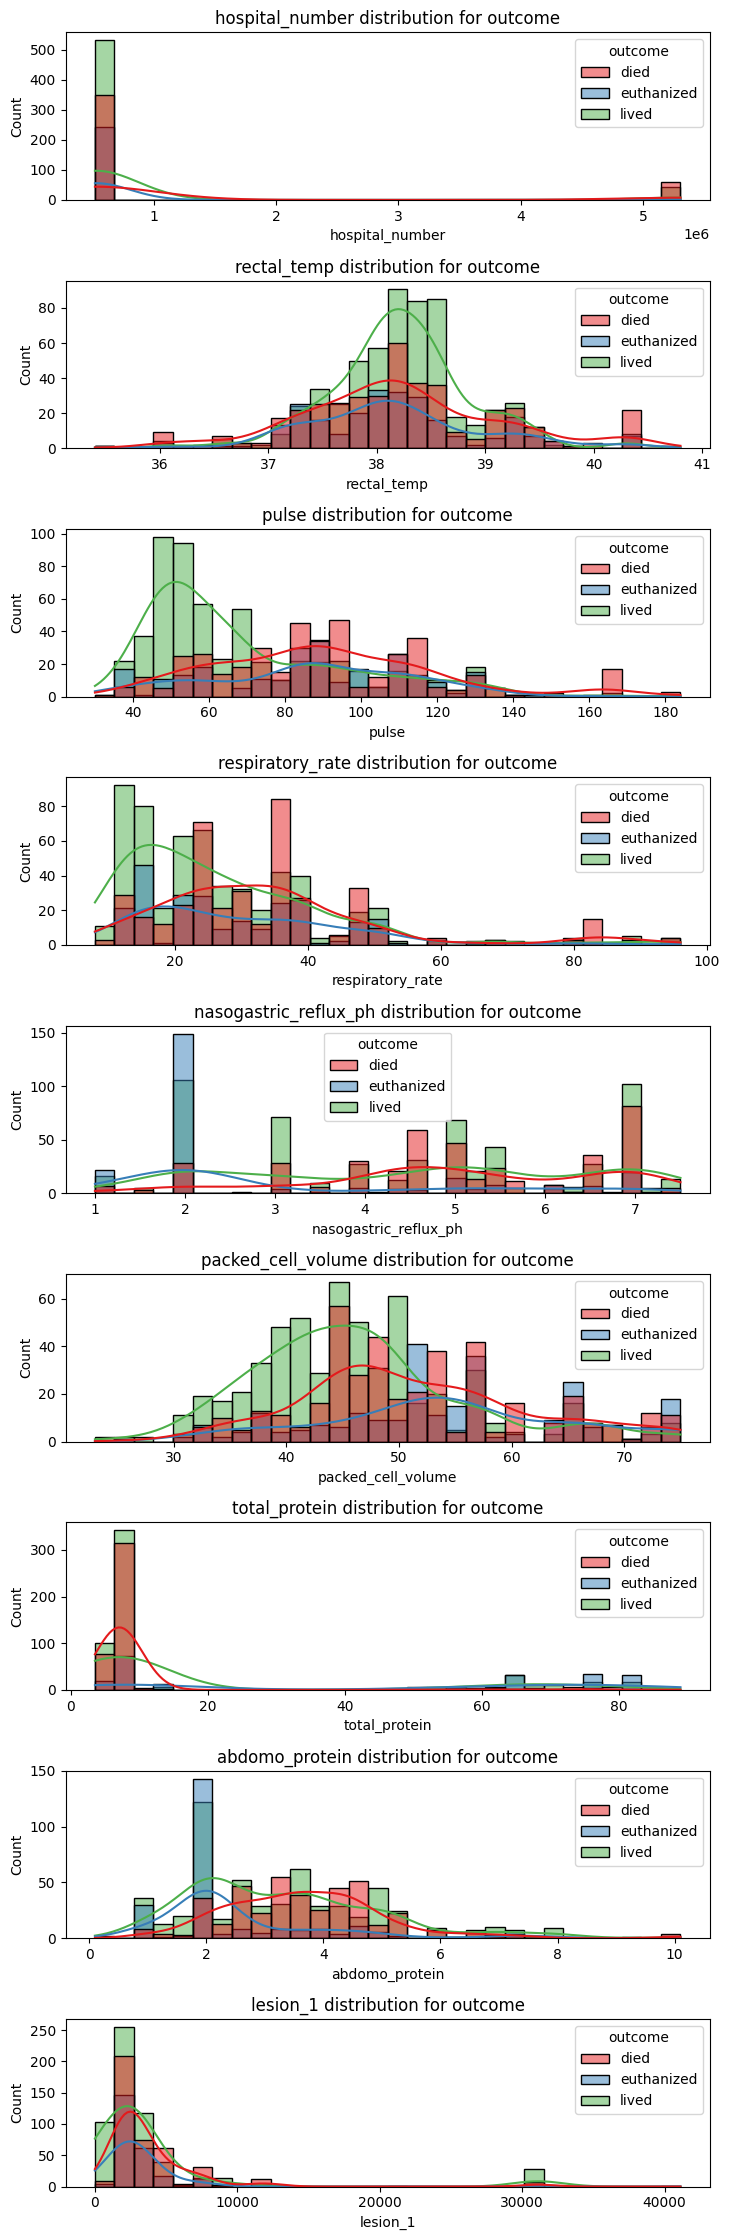

In [19]:
# Continuous Variable Distribution
plt.figure(figsize=(14,len(cont_cols)*2.5))

for idx,column in enumerate(cont_cols):
    plt.subplot(len(cont_cols),2,idx*2+1)
    sns.histplot(data=train,x=column,hue='outcome',bins=30,kde=True,palette='Set1')
    plt.title(f'{column} distribution for outcome')
    
plt.tight_layout()
plt.show()

In [20]:
# Continuous Variable Distribution with Outlier Check
df=pd.concat([train[cont_cols].assign(Source='train'),
             test[cont_cols].assign(Source='test'),
             original[cont_cols].assign(Source='original')],axis=0,ignore_index=True)
df.head(2)

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,Source
0,530001,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,train
1,533836,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,train


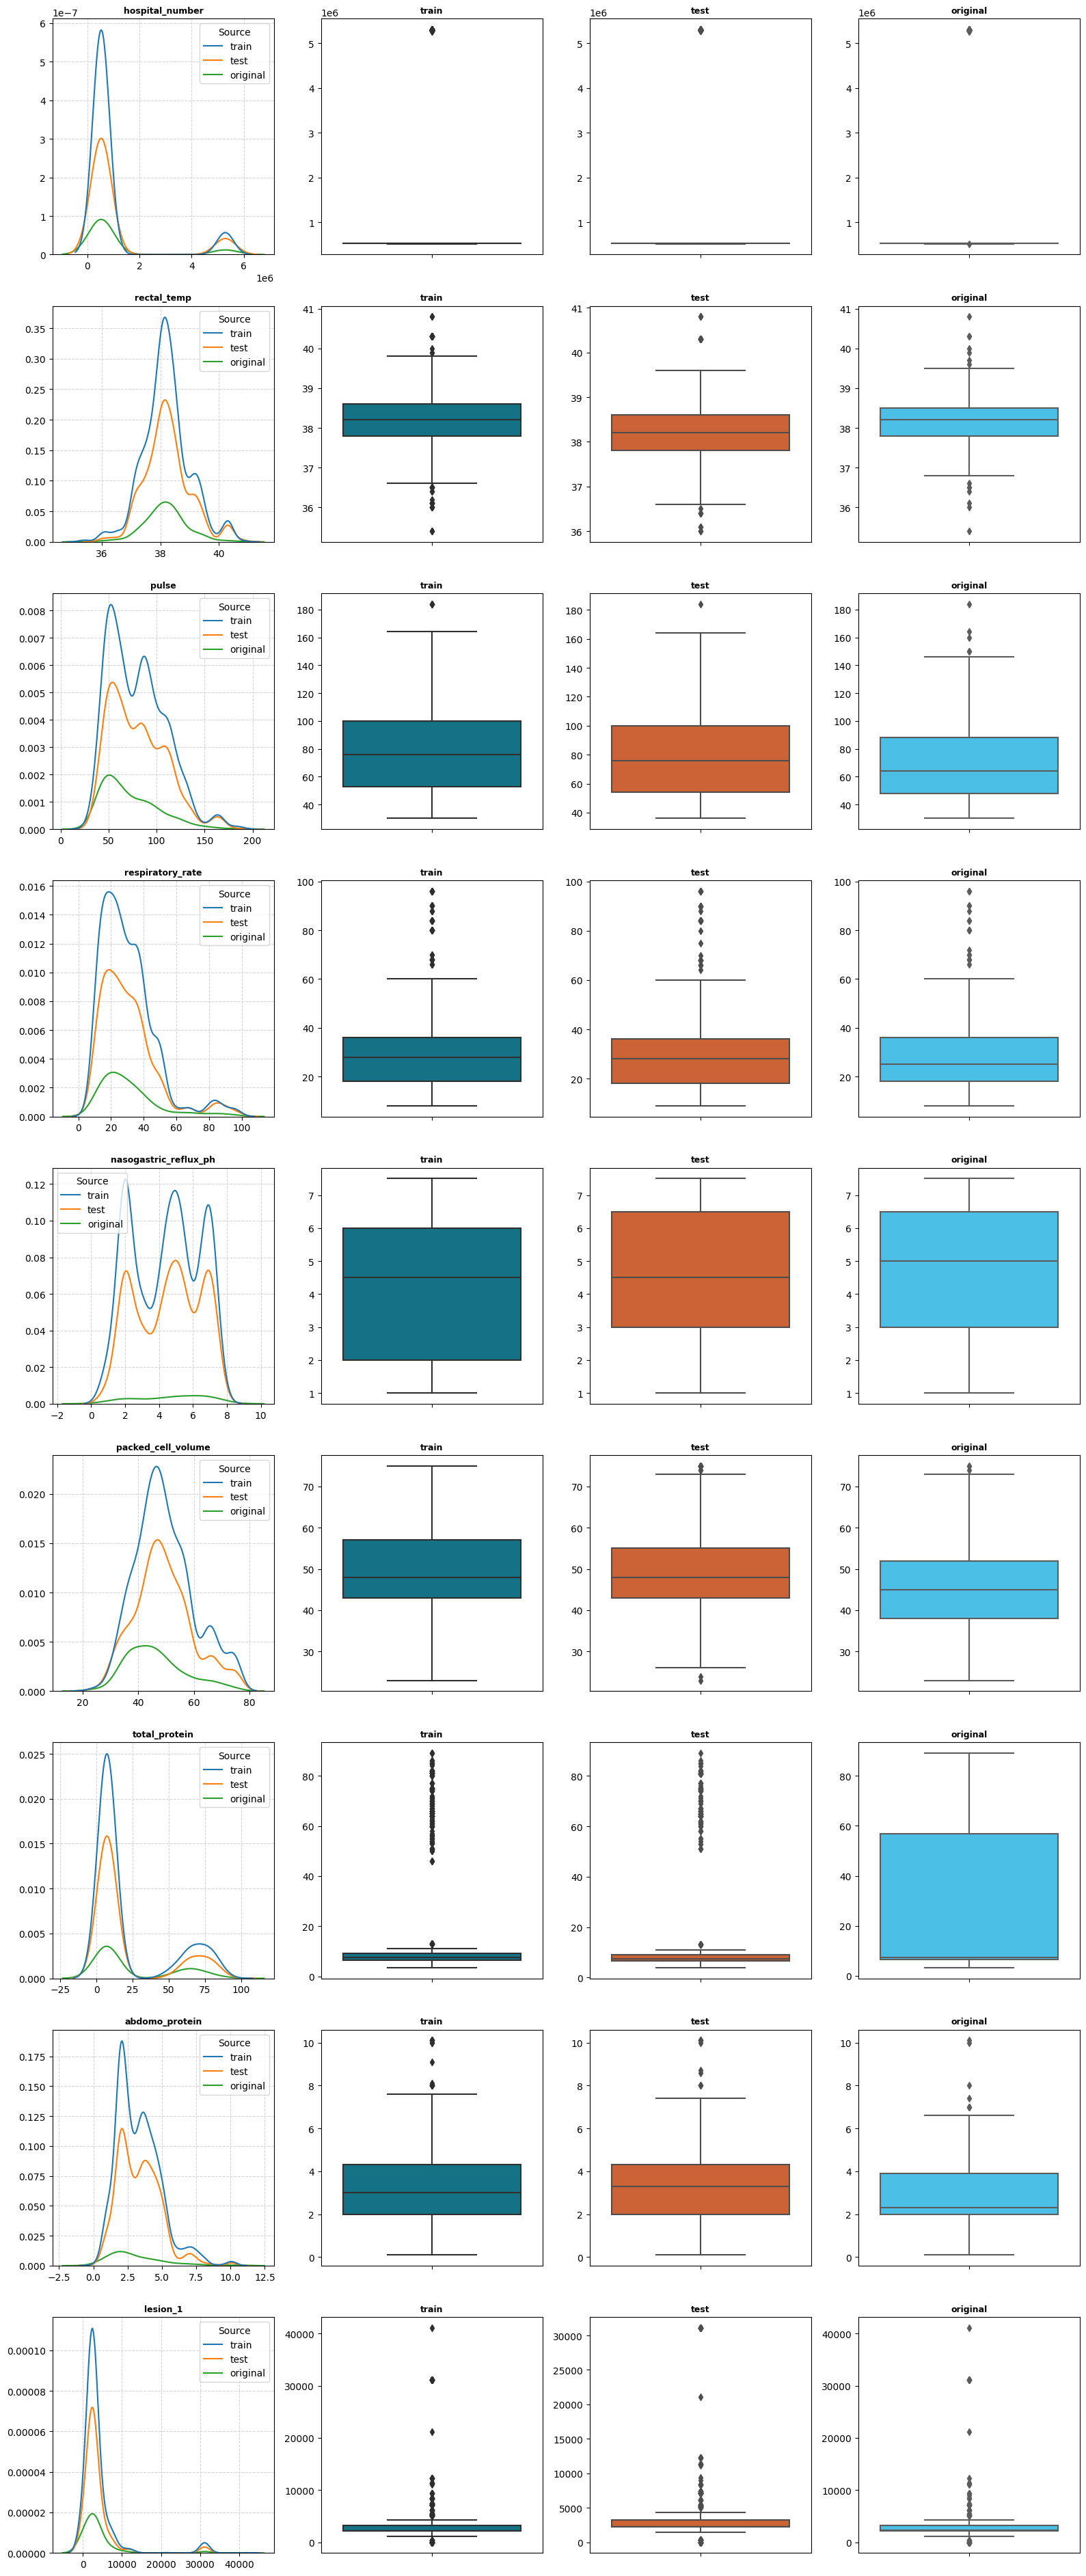

In [21]:
#now plotting the plot
fig,ax=plt.subplots(len(cont_cols), 4 ,figsize = (16, len(cont_cols) * 4.2))

for i,column in enumerate(cont_cols):
    #plotting kde plot
    sns.kdeplot(data=df[[column,'Source']],x=column,hue='Source',ax=ax[i,0])
    ax[i,0].grid(visible=True, which = 'both', linestyle = '--', color='lightgrey', linewidth = 0.75);
    ax[i,0].set(xlabel='',ylabel='')
    ax[i,0].set_title(f'{column}',fontdict={'fontweight':'bold','fontsize':9})
    
    #plotting box plot to check outliers
    #train dataset
    sns.boxplot(data=df.loc[df.Source=='train',[column]],y=column,ax=ax[i,1],color='#037d97')
    ax[i,1].set(xlabel='',ylabel='')
    ax[i,1].set_title('train',fontdict={'fontweight':'bold','fontsize':9})
    
    #test dataset
    sns.boxplot(data=df.loc[df.Source=='test',[column]],y=column,ax=ax[i,2],color='#E4591E')
    ax[i,2].set(xlabel='',ylabel='')
    ax[i,2].set_title('test',fontdict={'fontweight':'bold','fontsize':9})
    
    #original dataset
    sns.boxplot(data=df.loc[df.Source=='original',[column]],y=column,ax=ax[i,3],color='#33ccff')
    ax[i,3].set(xlabel='',ylabel='')
    ax[i,3].set_title('original',fontdict={'fontweight':'bold','fontsize':9})

plt.tight_layout()
plt.show()

#### Obserbations :
* There are `outlier` in features and some oultliers shown in train and  test dataset buut not present in original dataset like `total_protein`

# Feature Encoding

In [22]:
cont_cols

['hospital_number',
 'rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein',
 'lesion_1']

In [23]:
# removed lesion_2 and lesion_3 from cat_cols as it's datatype is int and target feature is  outcome didn't add.
cat_cols=['surgery','age','temp_of_extremities','peripheral_pulse','mucous_membrane',
          'capillary_refill_time','pain','peristalsis','abdominal_distention','nasogastric_tube',
          'nasogastric_reflux','rectal_exam_feces','abdomen','abdomo_appearance','surgical_lesion','cp_data']

# Label encode categorical columns
from sklearn.preprocessing import LabelEncoder
def feature_encoding (df,cat_cols):
    label_encoders = {}
    for column in cat_cols:
        le=LabelEncoder() # as you label encoding handle one column at a time hence loop used to do label encoding for all features
        df[column]=le.fit_transform(df[column])
        label_encoders[column]=le
    return df,label_encoders
        

In [24]:
train,label_encoders=feature_encoding(train,cat_cols)
test,label_encoders=feature_encoding(test,cat_cols)

In [25]:
label_encoders

{'surgery': LabelEncoder(),
 'age': LabelEncoder(),
 'temp_of_extremities': LabelEncoder(),
 'peripheral_pulse': LabelEncoder(),
 'mucous_membrane': LabelEncoder(),
 'capillary_refill_time': LabelEncoder(),
 'pain': LabelEncoder(),
 'peristalsis': LabelEncoder(),
 'abdominal_distention': LabelEncoder(),
 'nasogastric_tube': LabelEncoder(),
 'nasogastric_reflux': LabelEncoder(),
 'rectal_exam_feces': LabelEncoder(),
 'abdomen': LabelEncoder(),
 'abdomo_appearance': LabelEncoder(),
 'surgical_lesion': LabelEncoder(),
 'cp_data': LabelEncoder()}

In [26]:
train.head(3)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,1,0,530001,38.1,132.0,24.0,1,3,2,2,1,0,3,2,0,6.5,1,1,57.0,8.5,2,3.4,1,2209,0,0,0,died
1,1,0,533836,37.5,88.0,12.0,1,2,4,2,3,0,0,0,1,2.0,0,1,33.0,64.0,2,2.0,1,2208,0,0,0,euthanized
2,1,0,529812,38.3,120.0,28.0,1,3,5,1,2,3,0,2,2,3.5,5,0,37.0,6.4,2,3.4,1,5124,0,0,0,lived


In [27]:
test.head(3)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,534053,38.6,40.0,20.0,2,2,3,1,3,2,3,0,2,7.0,3,1,42.0,7.5,0,2.3,0,0,0,0,0
1,1,0,528469,38.2,112.0,48.0,1,3,0,2,1,2,0,2,2,3.5,1,1,44.0,6.0,2,2.6,0,2208,0,0,1
2,1,0,528178,37.7,66.0,12.0,1,2,1,1,3,2,3,2,2,3.0,3,1,31.5,6.0,1,1.6,1,2205,0,0,1


# Co - Relation

In [28]:
train_corr=train.copy()
train_corr['outcome']=train_corr['outcome'].map({'lived':0,'died':1,'euthanized':2})

# co - relation matrix table
corr=train_corr.corr()
corr

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
surgery,1.000000,0.053761,0.050706,-0.058994,0.134159,0.108996,-0.123436,0.098941,0.025058,0.072961,0.171993,-0.161256,-0.114794,-0.051171,-0.033178,-0.194118,-0.137406,-0.145903,0.049160,0.121621,0.201897,-0.127531,0.511866,0.074054,-0.023602,0.025227,-0.179764,0.058074
age,0.053761,1.000000,0.158483,0.062943,0.279871,0.189649,-0.051429,0.011397,-0.108423,0.073967,-0.023639,0.012504,0.002617,-0.007649,-0.000703,0.091045,0.011885,0.256472,-0.042230,-0.109876,0.060959,0.074228,0.083109,-0.000197,-0.019189,-0.010241,0.077785,0.020207
hospital_number,0.050706,0.158483,1.000000,-0.002552,0.118391,0.085008,-0.026067,-0.042159,-0.021727,0.012360,-0.021475,0.035764,-0.043691,-0.026260,-0.055275,0.114354,-0.002796,0.054961,-0.018028,-0.154746,0.029164,0.141800,0.067444,0.030844,0.022098,-0.012575,0.047859,-0.018769
rectal_temp,-0.058994,0.062943,-0.002552,1.000000,0.176761,0.124377,-0.047037,-0.041700,-0.090018,0.106480,-0.110423,0.052331,-0.048663,-0.008038,0.073990,0.115980,0.042780,0.043353,0.088986,-0.060842,0.012505,0.043342,-0.022199,0.021711,-0.022823,-0.005220,-0.007751,-0.027316
pulse,0.134159,0.279871,0.118391,0.176761,1.000000,0.395130,-0.285199,0.269071,-0.078367,0.432271,-0.137449,-0.320287,-0.165744,-0.063108,0.026162,-0.010132,-0.033480,-0.025671,0.435102,0.004373,0.374807,0.056391,0.234095,0.000037,0.021804,0.028273,-0.107638,0.282954
respiratory_rate,0.108996,0.189649,0.085008,0.124377,0.395130,1.000000,-0.162945,0.049589,-0.135431,0.175844,-0.069497,-0.133443,-0.086906,-0.087676,-0.098724,0.003854,-0.023038,0.030135,0.188777,0.004018,0.180161,0.004287,0.119134,0.020502,-0.010536,0.009663,-0.021069,0.109908
temp_of_extremities,-0.123436,-0.051429,-0.026067,-0.047037,-0.285199,-0.162945,1.000000,-0.128932,0.032423,-0.209074,0.083164,0.287965,0.152770,0.081722,0.012982,0.145032,0.104414,0.123787,-0.286524,-0.066070,-0.272769,0.057024,-0.181238,0.023541,-0.006743,-0.016532,0.091242,-0.206802
peripheral_pulse,0.098941,0.011397,-0.042159,-0.041700,0.269071,0.049589,-0.128932,1.000000,0.083766,0.242988,0.124597,-0.161759,-0.100583,0.007445,0.025317,-0.144816,-0.087422,-0.081171,0.201695,0.133436,0.243093,-0.065342,0.163006,0.005941,0.011547,0.021732,-0.117770,0.204166
mucous_membrane,0.025058,-0.108423,-0.021727,-0.090018,-0.078367,-0.135431,0.032423,0.083766,1.000000,-0.054338,0.191853,-0.161452,0.010557,0.085550,-0.029018,-0.038441,0.022399,-0.023286,-0.168368,0.094669,0.038778,-0.036962,-0.021327,0.025240,-0.030896,-0.026006,-0.074268,0.021248
capillary_refill_time,0.072961,0.073967,0.012360,0.106480,0.432271,0.175844,-0.209074,0.242988,-0.054338,1.000000,-0.097179,-0.273546,-0.080450,-0.007062,-0.005254,0.037104,-0.055930,-0.100353,0.385191,-0.022410,0.316891,0.029850,0.151032,0.002461,-0.038905,-0.027239,-0.117800,0.247937


In [29]:
def heatmap (corr):
    mask = np.zeros_like(corr) #create the same shape as the correlation matrix (corr) but is filled with zeros
    mask[np.triu_indices_from(mask)] = True #This line fills the upper triangle of the mask array with True values. This is done to mask out the upper triangle of the correlation matrix in the heatmap
    plt.figure(figsize=(14,10))
    sns.heatmap(data=corr,annot=True,fmt='.2f',cmap='YlOrBr_r',mask=mask,annot_kws={"size": 6},linewidths=.5)#annot_kws={"size": 6} -- it will help to set the fontsize of annotation
    plt.title('Train Dataset Co-Relation Matrix\n',fontdict={'fontweight':'bold','fontsize':12})

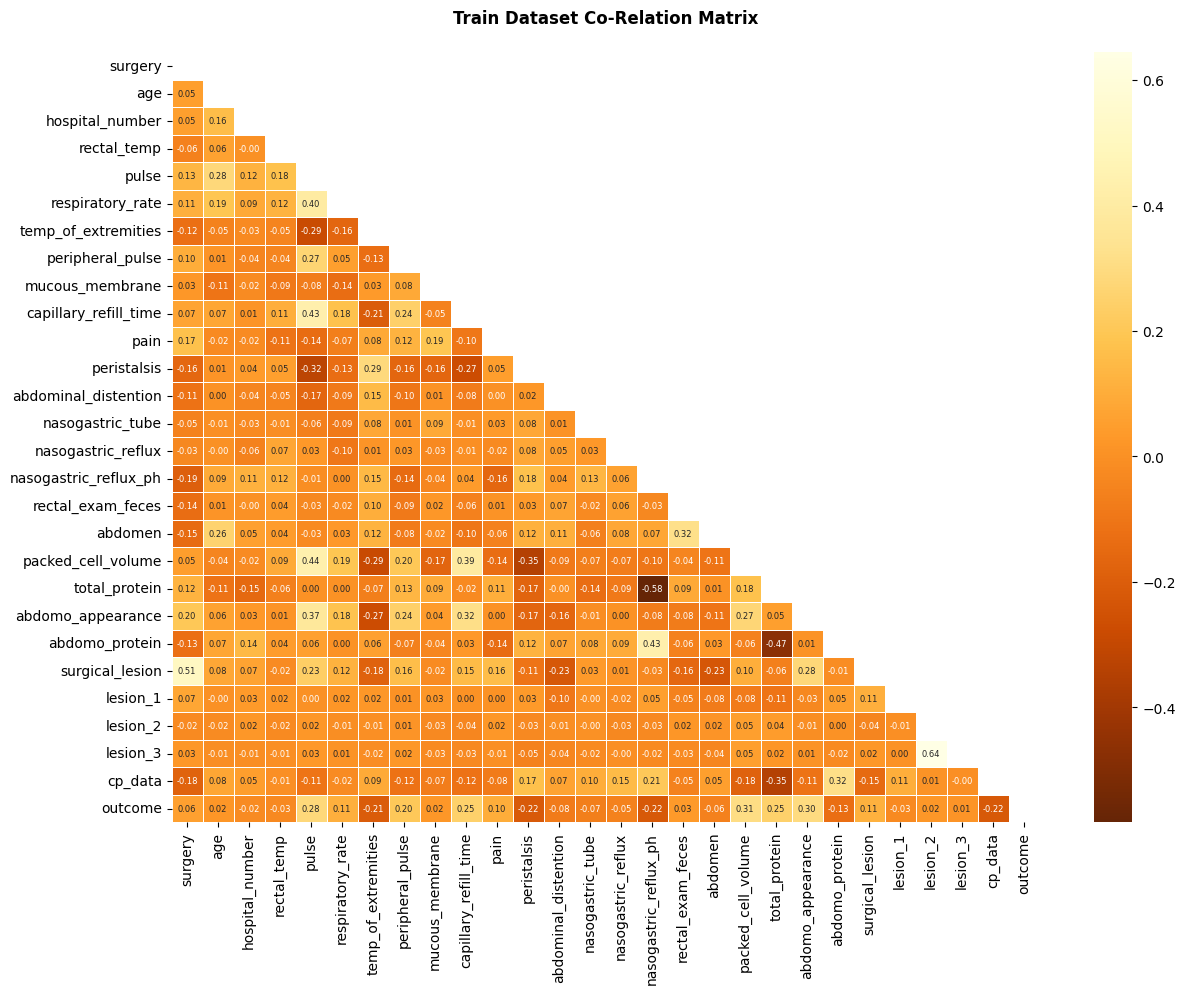

In [30]:
heatmap(corr)

#### Obserbations
* `hostpital_number` ,`abdomen`,`lesion_3` - these are less co-realted features with all the features.

# Imputation - Handling NULL Values

In [31]:
def imputation(df,cat_cols,cont_cols):
    for cols in cat_cols:
        df[cols]=df[cols].fillna(df[cols].mode()[0])
    for cols in cont_cols:
        df[cols]=df[cols].fillna(df[cols].median())
    return df

In [32]:
# removed lesion_2 and lesion_3 from cat_cols as it's datatype is int. 
# added hospital_number as it is a categoricaal type. 
# target feature is  outcome didn't add as it is not having any null value.
cat_cols=['surgery','age','hospital_number','temp_of_extremities','peripheral_pulse','mucous_membrane',
          'capillary_refill_time','pain','peristalsis','abdominal_distention','nasogastric_tube',
          'nasogastric_reflux','rectal_exam_feces','abdomen','abdomo_appearance','surgical_lesion','cp_data']

# adding lesion_2 and lesion_3
cont_cals=['rectal_temp','pulse','respiratory_rate','nasogastric_reflux_ph',
           'packed_cell_volume','total_protein','abdomo_protein','lesion_1','lesion_2','lesion_3']

train=imputation(train,cat_cols,cont_cals)
test=imputation(test,cat_cols,cont_cals)

In [33]:
train.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [34]:
test.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

# Modeling

<div style="border-radius:10px; border:#b2d790 solid; padding: 15px; background-color: #20BEFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#d79190'>💡 Multi-class vs Multi-label</font></h3>
The difference between multi-label classification and multi-class classification is as follows:
<br><br>
<b>Multi-label Classification:</b><br> Multi-label classification deals with scenarios where each data instance can be assigned to multiple labels or classes. This means that a single data point can belong to multiple classes simultaneously. For example, in image classification, an image may have multiple objects or attributes, and we want to predict all of them. This problem is tackled using multi-label classification.
<br><br>
<b>Multi-class Classification:</b><br> Multi-class classification, on the other hand, deals with scenarios where each data instance can be assigned to only one class out of several possible classes. Each data point is assigned to a single class exclusively.For example, classifying an email into categories like "spam," "ham," or "promotions" is a multi-class classification problem because each email belongs to one of these mutually exclusive categories This problem is tackled using multi-class classification.
<br><br>
<br>Algorithms like XGBoost, LightGBM, and CatBoost are powerful ensemble methods that can be effective for multi-label as well as multi-class classification tasks.  
<br><br>    
In the given problem, it is a multi-class problem. 

<br><br>

</div>

![](https://editor.analyticsvidhya.com/uploads/62036WhatsApp%20Image%202021-07-19%20at%2014.31.27.jpeg)

Image source: Analytics Vidhya

In [35]:
#model
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
#model selection
from sklearn.model_selection import KFold
#metrics
from sklearn.metrics import f1_score,confusion_matrix


In [36]:
# spilitting the input feature and target variable
train['outcome']=train['outcome'].map({'lived':0,'died':1,'euthanized':2})
X=train.drop('outcome',axis=1)
y=train['outcome']

In [37]:
xgb_cv_scores = list()
lgbm_cv_scores = list()
cat_cv_scores = list()

kf=KFold(n_splits=5,shuffle=True,random_state=42)


for idx,(train_idx,test_idx) in enumerate(kf.split(X,y)):
    X_train,X_test=X.iloc[train_idx],X.iloc[test_idx]
    y_train,y_test=y.iloc[train_idx],y.iloc[test_idx]
    
    
    print('---------------------------------------------------------------')
    
# Modified hyperparameters
    
    #XGBClassifier
    xgb_md = XGBClassifier(n_estimators=1000, 
                           max_depth=3, 
                           early_stopping_rounds=50,
                           learning_rate=0.55,
                           min_child_weight=2,
                           colsample_bytree=0.9,
                           objective='multi:softmax',
                           eval_metric='merror',
                           random_state=1)
    xgb_md.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=10000)
    xgb_pred=xgb_md.predict(X_test)
    xgb_f1 = f1_score(y_test, xgb_pred, average = 'micro')
    print('Fold', idx+1, '==> XGBoost oof F1 score is ==>', xgb_f1)
    xgb_cv_scores.append(xgb_f1)
    
    
    #LightGBM
    lgbm_md = LGBMClassifier(n_estimators=100, random_state=42)
    lgbm_md.fit(X_train, y_train)
    lgbm_pred = lgbm_md.predict(X_test)   
    lgbm_f1 = f1_score(y_test, lgbm_pred, average = 'micro') 
    print('Fold', idx+1, '==> LightGBM oof F1 score is ==>', lgbm_f1)
    lgbm_cv_scores.append(lgbm_f1)
    
    
    #CatBoost
    cat_md = CatBoostClassifier(loss_function = 'MultiClass',
                                iterations = 500,
                                learning_rate = 0.01,
                                depth = 7,
                                random_strength = 0.5,
                                bagging_temperature = 0.7,
                                border_count = 30,
                                l2_leaf_reg = 5,
                                verbose = False, 
                                task_type = 'CPU')
    cat_md.fit(X_train, y_train)
    cat_pred = cat_md.predict(X_test)   
    cat_f1 = f1_score(y_test, cat_pred, average = 'micro')
    print('Fold', idx+1, '==> CatBoost oof F1 score is ==>', cat_f1)
    cat_cv_scores.append(cat_f1)
    
    
print('---------------------------------------------------------------')
print('Average Accuracy of XGBoost model is:', np.mean(xgb_cv_scores))
print('Average Accuracy of LGBM model is:', np.mean(lgbm_cv_scores))
print('Average Accuracy of Catboost model is:', np.mean(cat_cv_scores))
    

---------------------------------------------------------------
[0]	validation_0-merror:0.36842
[61]	validation_0-merror:0.28745
Fold 1 ==> XGBoost oof F1 score is ==> 0.7489878542510121
Fold 1 ==> LightGBM oof F1 score is ==> 0.728744939271255
Fold 1 ==> CatBoost oof F1 score is ==> 0.7165991902834008
---------------------------------------------------------------
[0]	validation_0-merror:0.36842
[91]	validation_0-merror:0.25911
Fold 2 ==> XGBoost oof F1 score is ==> 0.757085020242915
Fold 2 ==> LightGBM oof F1 score is ==> 0.7206477732793523
Fold 2 ==> CatBoost oof F1 score is ==> 0.708502024291498
---------------------------------------------------------------
[0]	validation_0-merror:0.35628
[96]	validation_0-merror:0.31174
Fold 3 ==> XGBoost oof F1 score is ==> 0.7004048582995951
Fold 3 ==> LightGBM oof F1 score is ==> 0.6963562753036437
Fold 3 ==> CatBoost oof F1 score is ==> 0.6923076923076923
---------------------------------------------------------------
[0]	validation_0-merror:

# Feature Importances

In [38]:
def feature_importances(model):
    feature_importance=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
    return feature_importance

In [39]:
def plot_graph(feature_importance,model_name):
    plt.figure(figsize=(8,5))
    a=sns.barplot(x=feature_importance,y=feature_importance.index,palette='viridis')
    plt.xticks([])
    for j in ['right', 'top', 'bottom']:
        a.spines[j].set_visible(False)
    plt.title(f"{model_name} feature importances\n")
    plt.show()
    plt.tight_layout()

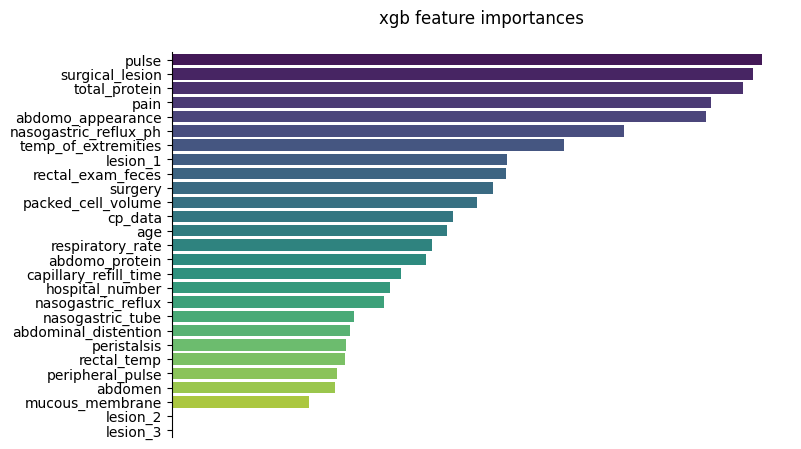

<Figure size 640x480 with 0 Axes>

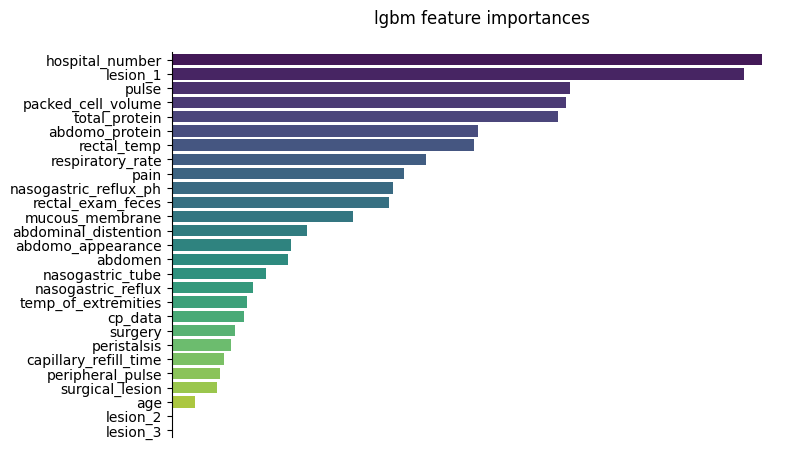

<Figure size 640x480 with 0 Axes>

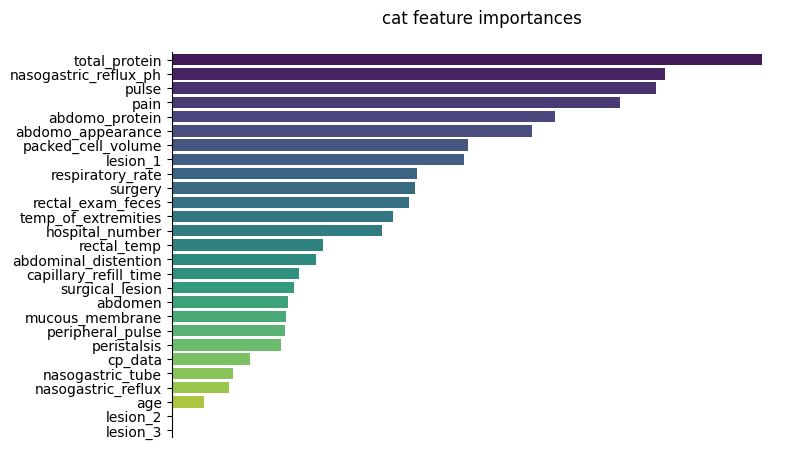

<Figure size 640x480 with 0 Axes>

In [40]:
plot_graph(feature_importances(xgb_md),'xgb')
plot_graph(feature_importances(lgbm_md),'lgbm')
plot_graph(feature_importances(cat_md),'cat')

# Final Submission

In [41]:
#Pred
xgb_md.fit(X,y,eval_set=[(X_test, y_test)])
xgb_pred_test = xgb_md.predict(test)
#Pred
lgbm_md.fit(X,y)
lgbm_pred_test = lgbm_md.predict(test)
#Pred
lgbm_md.fit(X,y)
cat_pred_test = cat_md.predict(test)
cat_pred_test=cat_pred_test.ravel() #convert 2-D into 1-D

[0]	validation_0-merror:0.31174
[1]	validation_0-merror:0.30364
[2]	validation_0-merror:0.27935
[3]	validation_0-merror:0.25101
[4]	validation_0-merror:0.25101
[5]	validation_0-merror:0.26316
[6]	validation_0-merror:0.25911
[7]	validation_0-merror:0.24696
[8]	validation_0-merror:0.23482
[9]	validation_0-merror:0.22672
[10]	validation_0-merror:0.21862
[11]	validation_0-merror:0.21457
[12]	validation_0-merror:0.21457
[13]	validation_0-merror:0.21053
[14]	validation_0-merror:0.19433
[15]	validation_0-merror:0.17814
[16]	validation_0-merror:0.18623
[17]	validation_0-merror:0.17814
[18]	validation_0-merror:0.17409
[19]	validation_0-merror:0.17409
[20]	validation_0-merror:0.17004
[21]	validation_0-merror:0.17409
[22]	validation_0-merror:0.17004
[23]	validation_0-merror:0.15789
[24]	validation_0-merror:0.16599
[25]	validation_0-merror:0.15385
[26]	validation_0-merror:0.15789
[27]	validation_0-merror:0.14170
[28]	validation_0-merror:0.14980
[29]	validation_0-merror:0.14575
[30]	validation_0-me

In [42]:
def get_submission(final_predictions,model_name):
    submission = pd.DataFrame({'id': id , 'outcome': final_predictions})
    submission['outcome'] = submission['outcome'].map({0:'lived',1:'died',2:'euthanized'})
    submission.to_csv(f'{model_name}_submission.csv',index=False)
    print(f'Result:{model_name}_submission is saved!')

    return submission

In [43]:
sub_xgb = get_submission(lgbm_pred_test,'xgb')
sub_lgbm = get_submission(xgb_pred_test,'lgbm')
sub_cat = get_submission(cat_pred_test,'catboost')

Result:xgb_submission is saved!
Result:lgbm_submission is saved!
Result:catboost_submission is saved!


In [44]:
# Get final prediction
preds = [sub_xgb,sub_lgbm,sub_cat]
merged_df = pd.concat(preds)
final_predictions = merged_df.groupby('id')['outcome'].apply(lambda x: x.mode().iloc[0]).reset_index()
final_predictions.to_csv('final_preds.csv',index=False)

<div style="border-radius:10px; border:#b2d790 solid; padding: 15px; background-color:  #20BEFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#d79190'>💡 Multiclass Classification Evaluation Method - Micro Average F1 Score: A Closer Look</font></h3>

* Micro Average F1 Score: In multiclass classification problems, the Micro Average F1 Score provides a comprehensive measure of a model's performance, especially when there's class imbalance. It considers every instance or prediction equally, regardless of the class. Specifically, it aggregates the contributions of all classes to compute the average metric.

* Example: Consider we have a multiclass classification problem where we predict animal types: Cats, Dogs, and Birds. Let's say the total number of instances are 1000, where:
True Cats: 800, Predicted Cats: 750
True Dogs: 100, Predicted Dogs: 125
True Birds: 100, Predicted Birds: 125
Using these numbers, we'd first calculate the overall true positives, false positives, and false negatives and then compute the F1 score. The micro-averaged F1 score would be a measure based on all 1000 instances.

* Class Imbalance Concerns: When datasets have an imbalanced class distribution, performance metrics can be skewed. In such cases, the Micro Average F1 Score proves valuable as it takes into account true positives, false positives, and false negatives from all classes to provide a holistic measure.

* Difference from Macro Average: While both are popular evaluation metrics for multiclass classification, they have distinct applications. Micro averages the performance on individual instances, making it less sensitive to class imbalance. On the other hand, Macro average treats each class equally, averaging the performance on a per-class basis. This means, if performance on a minority class is poor, it will reflect heavily on the Macro averaged result.

* Practical Implications: In real-world applications with imbalanced datasets, relying solely on metrics like accuracy or macro-averaged scores might be misleading. Micro Average F1 Score serves as a more consistent measure, ensuring that the model's performance is evaluated holistically across all instances and classes.

* Final Note: It's essential to choose the right evaluation metric based on the nature of the problem and the dataset at hand. Micro Average F1 Score stands out as a robust metric for datasets with varying class distributions, ensuring that every prediction, irrespective of its class, contributes equally to the final score.

# References
* https://www.kaggle.com/code/kimtaehun/eda-and-baseline-with-multiple-models
* https://www.kaggle.com/code/ravi20076/playgrounds3e22-eda-baseline
* https://www.kaggle.com/code/yaaangzhou/playground-s3-e22-eda-modeling#Predict-Health-Outcomes-of-Horses

Thank You :)